# Dataset
Ya procesado y con datos específicos seleccionados

## CON feature selection

In [1]:
import pandas as pd
train = pd.read_csv("/content/drive/MyDrive/QuintuSCAN/data/UNSW_NB15_fisher_train.csv")
test = pd.read_csv("/content/drive/MyDrive/QuintuSCAN/data/UNSW_NB15_fisher_test.csv")

In [2]:
train

,sttl,state_INT,ct_state_ttl,proto_tcp,swin,dload,state_CON,dwin,state_FIN,label,attack_cat,attack
0,252,False,0,True,255,8495.365234,False,255,True,0,Normal,0
1,62,False,1,True,255,503571.312500,False,255,True,0,Normal,0
2,62,False,1,True,255,60929.230470,False,255,True,0,Normal,0
3,62,False,1,True,255,3358.622070,False,255,True,0,Normal,0
4,254,False,1,True,255,3987.059814,False,255,True,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...
257668,254,True,2,False,0,0.000000,False,0,False,0,Normal,0
257669,254,False,1,True,255,2242.109863,False,255,True,0,Normal,0
257670,0,True,2,False,0,0.000000,False,0,False,0,Normal,0
257671,0,True,2,False,0,0.000000,False,0,False,0,Normal,0


In [3]:
test

,sttl,state_INT,ct_state_ttl,proto_tcp,swin,dload,state_CON,dwin,state_FIN,label,attack_cat,attack
0,252,False,0,True,255,8495.365234,False,255,True,0,Normal,0
1,62,False,1,True,255,503571.312500,False,255,True,0,Normal,0
2,62,False,1,True,255,60929.230470,False,255,True,0,Normal,0
3,62,False,1,True,255,3358.622070,False,255,True,0,Normal,0
4,254,False,1,True,255,3987.059814,False,255,True,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...
257668,254,True,2,False,0,0.000000,False,0,False,0,Normal,0
257669,254,False,1,True,255,2242.109863,False,255,True,0,Normal,0
257670,0,True,2,False,0,0.000000,False,0,False,0,Normal,0
257671,0,True,2,False,0,0.000000,False,0,False,0,Normal,0


In [4]:
# Data separation:
train = train.drop(columns=["attack_cat", "attack"])
test = test.drop(columns=["attack_cat", "attack"])

X_train = train.drop(columns=["label"])
y_train = train["label"]
X_test = test.drop(columns=["label"])
y_test = test["label"]

seed = 11

## SIN feature selection

In [5]:
z_train = pd.read_csv("/content/drive/MyDrive/QuintuSCAN/data/UNSW_NB15_onehot_train.csv")
z_test = pd.read_csv("/content/drive/MyDrive/QuintuSCAN/data/UNSW_NB15_onehot_test.csv")

In [6]:
# Data separation:
z_train = z_train.drop(columns=["attack_cat", "attack"])
z_test = z_test.drop(columns=["attack_cat", "attack"])

z_X_train = z_train.drop(columns=["label"])
z_y_train = z_train["label"]
z_X_test = z_test.drop(columns=["label"])
z_y_test = z_test["label"]

In [7]:
z_train

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,...,service_irc,service_none,service_pop3,service_radius,service_smtp,service_snmp,service_ssh,service_ssl,state_ACC,state_CLO
0,0.121478,6,4,258,172,74.087490,252,254,1.415894e+04,8495.365234,...,0,1,0,0,0,0,0,0,0,0
1,0.649902,14,38,734,42014,78.473372,62,252,8.395112e+03,503571.312500,...,0,1,0,0,0,0,0,0,0,0
2,1.623129,8,16,364,13186,14.170161,62,252,1.572272e+03,60929.230470,...,0,1,0,0,0,0,0,0,0,0
3,1.681642,12,12,628,770,13.677108,62,252,2.740179e+03,3358.622070,...,0,0,0,0,0,0,0,0,0,0
4,0.449454,10,6,534,268,33.373826,254,252,8.561499e+03,3987.059814,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175336,0.000009,2,0,114,0,111111.107200,254,0,5.066666e+07,0.000000,...,0,0,0,0,0,0,0,0,0,0
175337,0.505762,10,8,620,354,33.612649,254,252,8.826286e+03,4903.492188,...,0,1,0,0,0,0,0,0,0,0
175338,0.000009,2,0,114,0,111111.107200,254,0,5.066666e+07,0.000000,...,0,0,0,0,0,0,0,0,0,0
175339,0.000009,2,0,114,0,111111.107200,254,0,5.066666e+07,0.000000,...,0,0,0,0,0,0,0,0,0,0


In [8]:
z_test

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,...,service_irc,service_none,service_pop3,service_radius,service_smtp,service_snmp,service_ssh,service_ssl,state_ACC,state_CLO
0,0.000011,2,0,496,0,90909.090200,254,0,1.803636e+08,0.000000,...,0,1,0,0,0,0,0,0,0,0
1,0.000008,2,0,1762,0,125000.000300,254,0,8.810000e+08,0.000000,...,0,1,0,0,0,0,0,0,0,0
2,0.000005,2,0,1068,0,200000.005100,254,0,8.544000e+08,0.000000,...,0,1,0,0,0,0,0,0,0,0
3,0.000006,2,0,900,0,166666.660800,254,0,6.000000e+08,0.000000,...,0,1,0,0,0,0,0,0,0,0
4,0.000010,2,0,2126,0,100000.002500,254,0,8.504000e+08,0.000000,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82327,0.000005,2,0,104,0,200000.005100,254,0,8.320000e+07,0.000000,...,0,1,0,0,0,0,0,0,0,0
82328,1.106101,20,8,18062,354,24.410067,254,252,1.241044e+05,2242.109863,...,0,1,0,0,0,0,0,0,0,0
82329,0.000000,1,0,46,0,0.000000,0,0,0.000000e+00,0.000000,...,0,1,0,0,0,0,0,0,0,0
82330,0.000000,1,0,46,0,0.000000,0,0,0.000000e+00,0.000000,...,0,1,0,0,0,0,0,0,0,0


# Modelos

## Random Forest

### CON feature selection

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Model training:
M1_rf_model = RandomForestClassifier(n_estimators=100, random_state=seed)
M1_rf_model.fit(X_train, y_train)
y_pred = M1_rf_model.predict(X_test)

# Model evaluation:
y_pred = M1_rf_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.93      0.96     93000
           1       0.96      1.00      0.98    164673

    accuracy                           0.97    257673
   macro avg       0.98      0.96      0.97    257673
weighted avg       0.97      0.97      0.97    257673



In [10]:
# MODELO ENTRENADO SELECCIONADO PARA PRODUCCIÓN:
import pickle
with open("/content/drive/MyDrive/QuintuSCAN/models/anomalies_rf.pkl", "wb") as modelfile:
    pickle.dump(M1_rf_model, modelfile)

### SIN feature selection

In [11]:
# Model training:
rf_model = RandomForestClassifier(n_estimators=100, random_state=seed)
rf_model.fit(z_X_train, z_y_train)
z_y_pred = rf_model.predict(z_X_test)

# Model evaluation:
z_y_pred = rf_model.predict(z_X_test)
print(classification_report(z_y_test, z_y_pred))

              precision    recall  f1-score   support

           0       0.98      0.73      0.84     37000
           1       0.82      0.98      0.89     45332

    accuracy                           0.87     82332
   macro avg       0.90      0.86      0.86     82332
weighted avg       0.89      0.87      0.87     82332



## XGBoost

### CON feature selection

In [12]:
from xgboost import XGBClassifier

# Model training:
M2_xgb_model = XGBClassifier(n_estimators=100, random_state=seed)
M2_xgb_model.fit(X_train, y_train)
y_pred = M2_xgb_model.predict(X_test)

# Model evaluation:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.71      0.83     93000
           1       0.86      1.00      0.92    164673

    accuracy                           0.89    257673
   macro avg       0.93      0.85      0.88    257673
weighted avg       0.91      0.89      0.89    257673



### SIN feature selection

In [13]:
# Model training:
xgb_model = XGBClassifier(n_estimators=100, random_state=seed)
xgb_model.fit(z_X_train, z_y_train)
z_y_pred = xgb_model.predict(z_X_test)

# Model evaluation:
print(classification_report(z_y_test, z_y_pred))

              precision    recall  f1-score   support

           0       0.98      0.74      0.84     37000
           1       0.82      0.98      0.90     45332

    accuracy                           0.87     82332
   macro avg       0.90      0.86      0.87     82332
weighted avg       0.89      0.87      0.87     82332



## Regresión Logistica

### CON feature selection

In [14]:
from sklearn.linear_model import LogisticRegression

# Model training:
M3_lr_model = LogisticRegression(random_state=seed)
M3_lr_model.fit(X_train, y_train)
y_pred = M3_lr_model.predict(X_test)

# Model evaluation:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.69      0.72     93000
           1       0.83      0.87      0.85    164673

    accuracy                           0.80    257673
   macro avg       0.79      0.78      0.78    257673
weighted avg       0.80      0.80      0.80    257673



### SIN feature selection

In [15]:
# Model training:
lr_model = LogisticRegression(random_state=seed)
lr_model.fit(z_X_train, z_y_train)
z_y_pred = lr_model.predict(z_X_test)

# Model evaluation:
print(classification_report(z_y_test, z_y_pred))

              precision    recall  f1-score   support

           0       0.89      0.39      0.55     37000
           1       0.66      0.96      0.78     45332

    accuracy                           0.71     82332
   macro avg       0.78      0.68      0.66     82332
weighted avg       0.77      0.71      0.68     82332



## KNN

### CON feature selection

In [16]:
from sklearn.neighbors import KNeighborsClassifier

# Model training:
M4_knn_model = KNeighborsClassifier()
M4_knn_model.fit(X_train, y_train)
y_pred = M4_knn_model.predict(X_test)

# Model evaluation:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.41      0.87      0.56     93000
           1       0.80      0.30      0.44    164673

    accuracy                           0.50    257673
   macro avg       0.60      0.58      0.50    257673
weighted avg       0.66      0.50      0.48    257673



### SIN feature selection

In [17]:
# Model training:
knn_model = KNeighborsClassifier()
knn_model.fit(z_X_train, z_y_train)
z_y_pred = knn_model.predict(z_X_test)

# Model evaluation:
print(classification_report(z_y_test, z_y_pred))

              precision    recall  f1-score   support

           0       0.89      0.59      0.71     37000
           1       0.74      0.94      0.83     45332

    accuracy                           0.79     82332
   macro avg       0.82      0.77      0.77     82332
weighted avg       0.81      0.79      0.78     82332



# Velocidad

In [18]:
import time

# RandomForest:
start_time_rf = time.time()
y_pred_rf = M1_rf_model.predict(X_test)
end_time_rf = time.time()

print("RandomForest Predictions Time:", end_time_rf - start_time_rf)
print("RandomForest Classification Report:")
print(classification_report(y_test, y_pred_rf))

# XGBoost:
start_time_xgb = time.time()
y_pred_xgb = M2_xgb_model.predict(X_test)
end_time_xgb = time.time()

print("XGBoost Predictions Time:", end_time_xgb - start_time_xgb)
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))

# Logistic Regression:
start_time_lr = time.time()
y_pred_lr = M3_lr_model.predict(X_test)
end_time_lr = time.time()

print("Logistic Regression Predictions Time:", end_time_lr - start_time_lr)
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))

# KNN:
start_time_knn = time.time()
y_pred_knn = M4_knn_model.predict(X_test)
end_time_knn = time.time()

print("KNN Predictions Time:", end_time_knn - start_time_knn)
print("KNN Classification Report:")
print(classification_report(y_test, y_pred_knn))

RandomForest Predictions Time: 4.282477855682373
RandomForest Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.93      0.96     93000
           1       0.96      1.00      0.98    164673

    accuracy                           0.97    257673
   macro avg       0.98      0.96      0.97    257673
weighted avg       0.97      0.97      0.97    257673

XGBoost Predictions Time: 0.6229813098907471
XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.71      0.83     93000
           1       0.86      1.00      0.92    164673

    accuracy                           0.89    257673
   macro avg       0.93      0.85      0.88    257673
weighted avg       0.91      0.89      0.89    257673

Logistic Regression Predictions Time: 0.019334077835083008
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.75     

# Predicción Multiclase

* [1] Generic
* [2] Fuzzers
* [3] Analysis
* [4] Backdoors
* [5] DoS
* [6] Exploits
* [7] Reconnaissance
* [8] Shellcode
* [9] Worms

In [19]:
import pandas as pd
train = pd.read_csv("/content/drive/MyDrive/QuintuSCAN/data/UNSW_NB15_fisher_train.csv")
test = pd.read_csv("/content/drive/MyDrive/QuintuSCAN/data/UNSW_NB15_fisher_test.csv")

train = train.drop(columns=["attack_cat", "label"])
train = train[train["attack"] != 0]

test = test.drop(columns=["attack_cat", "label"])
test = test[test["attack"] != 0]

X_train = train.drop(columns=["attack"])
y_train = train["attack"]
X_test = test.drop(columns=["attack"])
y_test = test["attack"]

seed = 11

## Random Forest

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Model training:
RF_Model = RandomForestClassifier(n_estimators=100, random_state=seed)
RF_Model.fit(X_train, y_train)
y_pred = RF_Model.predict(X_test)

# Model evaluation:
y_pred = RF_Model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.55      1.00      0.71     58871
           2       0.95      0.64      0.77     44525
           3       1.00      0.64      0.78     24246
           4       0.97      0.21      0.34     16353
           5       0.99      0.49      0.66     13987
           6       1.00      0.23      0.37      2677
           7       1.00      0.15      0.26      2329
           8       0.99      0.49      0.66      1511
           9       0.99      0.80      0.89       174

    accuracy                           0.70    164673
   macro avg       0.94      0.52      0.60    164673
weighted avg       0.82      0.70      0.68    164673



In [21]:
# MODELO ENTRENADO SELECCIONADO PARA PRODUCCIÓN:
with open("/content/drive/MyDrive/QuintuSCAN/models/attacks_rf.pkl", "wb") as modelfile:
    pickle.dump(RF_Model, modelfile)

## Red Neuronal FeedForward

In [22]:
train = pd.read_csv("/content/drive/MyDrive/QuintuSCAN/data/UNSW_NB15_onehot_train.csv")
test = pd.read_csv("/content/drive/MyDrive/QuintuSCAN/data/UNSW_NB15_onehot_test.csv")

train = train.drop(columns=["attack_cat", "label"])
train = train[train["attack"] != 0]

test = test.drop(columns=["attack_cat", "label"])
test = test[test["attack"] != 0]

X_train = train.drop(columns=["attack"])
y_train = train["attack"]
X_test = test.drop(columns=["attack"])
y_test = test["attack"]

seed = 11

In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from sklearn.metrics import classification_report

# Normalización de datos:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Codificación de etiquetas:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Arquitectura:
model = Sequential()
model.add(Dense(256, input_dim=X_train_scaled.shape[1], activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(128, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(9, activation="softmax"))

# Compilación:
optimizer = Adam(learning_rate=0.001)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

Epoch 1/24
933/933 [==============================] - 9s 8ms/step - loss: 0.7543 - accuracy: 0.7320 - val_loss: 0.6345 - val_accuracy: 0.7720
Epoch 2/24
933/933 [==============================] - 6s 6ms/step - loss: 0.6459 - accuracy: 0.7641 - val_loss: 0.5989 - val_accuracy: 0.7788
Epoch 3/24
933/933 [==============================] - 7s 7ms/step - loss: 0.6186 - accuracy: 0.7719 - val_loss: 0.6058 - val_accuracy: 0.7809
Epoch 4/24
933/933 [==============================] - 5s 5ms/step - loss: 0.6025 - accuracy: 0.7769 - val_loss: 0.5798 - val_accuracy: 0.7844
Epoch 5/24
933/933 [==============================] - 6s 7ms/step - loss: 0.5908 - accuracy: 0.7796 - val_loss: 0.5780 - val_accuracy: 0.7867
Epoch 6/24
933/933 [==============================] - 5s 5ms/step - loss: 0.5810 - accuracy: 0.7829 - val_loss: 0.5700 - val_accuracy: 0.7905
Epoch 7/24
933/933 [==============================] - 6s 6ms/step - loss: 0.5762 - accuracy: 0.7840 - val_loss: 0.5879 - val_accuracy: 0.7885
Epoch 

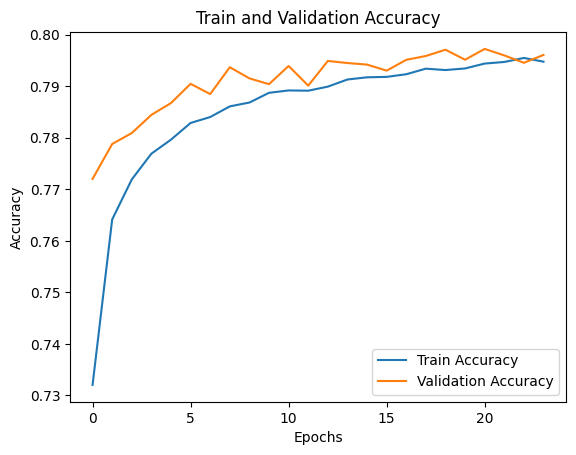

In [24]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

# Entrenamiento:
history = model.fit(X_train_scaled, y_train_encoded, epochs=24, batch_size=128, verbose=1, validation_data=(X_test_scaled, y_test_encoded))

# Predicción del modelo:
y_pred_encoded = np.argmax(model.predict(X_test_scaled), axis=-1)
y_pred = label_encoder.inverse_transform(y_pred_encoded)

# Evaluación del modelo:
print(classification_report(y_test, y_pred))

# Gráfica del aprendizaje y la validación:
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Train and Validation Accuracy")
plt.legend()
plt.show()

In [25]:
# Predicciones:
y_prob = model.predict(X_test_scaled)

# Curva ROC y AUC:
auc = roc_auc_score(y_test_encoded, y_prob, multi_class='ovr')

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(label_encoder.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test_encoded == i, y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
plt.plot(fpr[2], tpr[2], color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

print("AUC:", auc)

1417/1417 [==============================] - 2s 2ms/step


TypeError: 'numpy.float64' object is not callable

In [ ]:
# Guarda la red:
model.save("feedforward_attack_classification.h5")